In [ ]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
'''T1. Import DataFrame `df`'''
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1 = pd.read_csv('Project_SPX.csv')
df1.info(),df1.shape

df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              2588 non-null   object 
 1   SPXT              2588 non-null   float64
 2   SPXT_7D_RTN       2584 non-null   float64
 3   SPXT_1M_RTN       2566 non-null   float64
 4   SPXT_3M_RTN       2523 non-null   float64
 5   SPXT_7D_POS       2588 non-null   int64  
 6   SPXT_1M_POS       2588 non-null   int64  
 7   SPXT_3M_POS       2588 non-null   int64  
 8   SPX               2588 non-null   float64
 9   SPX_7D_RTN        2584 non-null   float64
 10  SPX_1M_RTN        2566 non-null   float64
 11  SPX_3M_RTN        2523 non-null   float64
 12  SPX_7D_POS        2588 non-null   int64  
 13  SPX_1M_POS        2588 non-null   int64  
 14  SPX_3M_POS        2588 non-null   int64  
 15  2_10_curve        2569 non-null   float64
 16  SPX_IV            2587 non-null   float64


Index(['date', 'SPXT', 'SPXT_7D_RTN', 'SPXT_1M_RTN', 'SPXT_3M_RTN',
       'SPXT_7D_POS', 'SPXT_1M_POS', 'SPXT_3M_POS', 'SPX', 'SPX_7D_RTN',
       'SPX_1M_RTN', 'SPX_3M_RTN', 'SPX_7D_POS', 'SPX_1M_POS', 'SPX_3M_POS',
       '2_10_curve', 'SPX_IV', 'TY_1M_25DC', 'DIX', 'GEX', '3M_LIBOR',
       '3M_OIS', 'LOIS', 'SELL2_BUY10', 'INFL_SWP_1Y', 'INFL_SWP_2Y',
       'INFL_SWP_5Y', 'INFL_SWP_10Y', 'ELECTION_YEAR', 'CDX_IG', 'CDX_HY',
       'CDX_EM', 'FARWSHO', 'USD_3M_FRA_OIS_1', 'USD_3M_FRA_OIS_2',
       'USD_3M_FRA_OIS_3', 'EUR_3M_FRA_OIS_1', 'GBP_3M_FRA_OIS_1',
       'GFC_TSY_RP', 'GFC_MBS_RP'],
      dtype='object')

0.6935857805255023

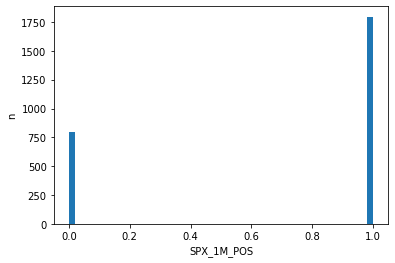

In [ ]:
# import matplotlib.pyplot as plt

# # YOUR CODE HERE
x = 'SPX_1M_POS'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()


0.758887171561051

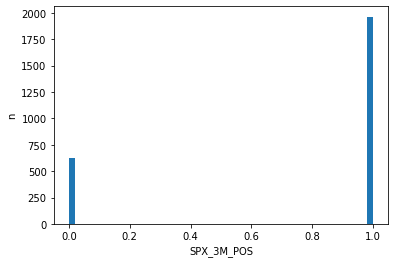

In [ ]:
x = 'SPX_3M_POS'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

0.7836166924265843

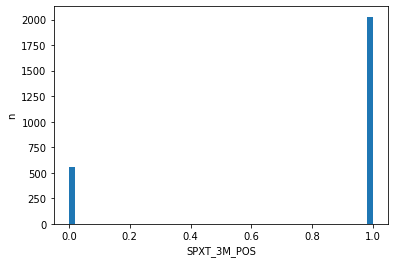

In [ ]:
x = 'SPXT_3M_POS'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

0.7098145285935085

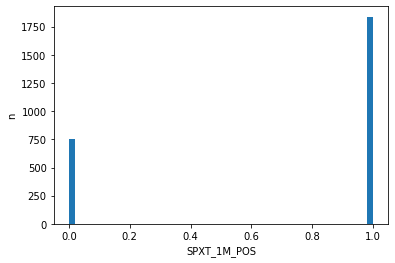

In [ ]:
x = 'SPXT_1M_POS'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

Text(0, 0.5, 'SPX_3M_RTN')

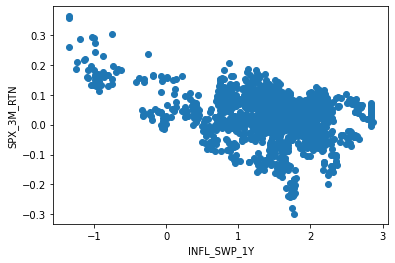

In [ ]:
import matplotlib.pyplot as plt

# YOUR CODE HERE
x1 = 'INFL_SWP_1Y'
y1 = 'SPX_3M_RTN'

plt.scatter(df1[x1], df1[y1])
plt.xlabel(x1)
plt.ylabel(y1)



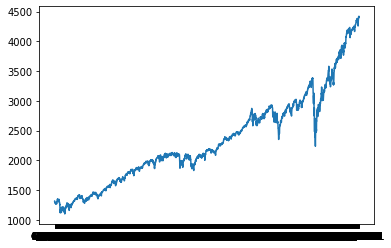

In [ ]:
X = df1['date']
Y1 = df1['SPX']
plt.plot(X,Y1)



0.0011691348402182386

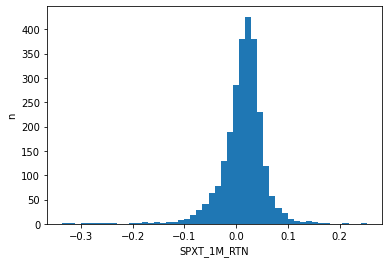

In [ ]:
x = 'SPXT_1M_RTN'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

0.0007927070947284979

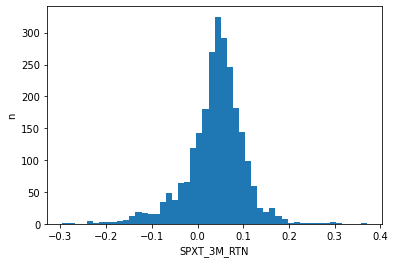

In [ ]:
x = 'SPXT_3M_RTN'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

0.0011691348402182386

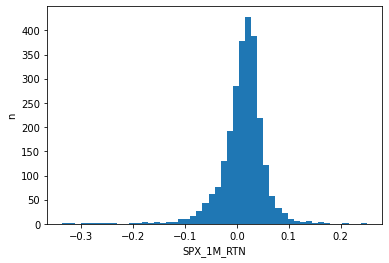

In [ ]:
x = 'SPX_1M_RTN'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

0.0007927070947284979

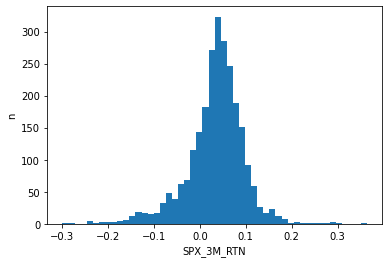

In [ ]:
x = 'SPX_3M_RTN'

plt.hist(df1[x],bins=50);
plt.xlabel(x)
plt.ylabel('n')


y = df1[x]
y.value_counts(normalize=True).max()

## **WRANGLE**

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')

    #creating inflation swap curve
    df['INFLATION_CURVE_1_10'] = df['INFL_SWP_10Y'] - df['INFL_SWP_1Y']
    df['INFLATION_CURVE_1_5'] = df['INFL_SWP_5Y'] - df['INFL_SWP_1Y']

    #creating FRA_OIS curve
    df['FRA_OIS_1_3'] = df['USD_3M_FRA_OIS_3'] - df['USD_3M_FRA_OIS_1']
    df['FRA_OIS_1_2'] = df['USD_3M_FRA_OIS_2'] - df['USD_3M_FRA_OIS_1']

    #Drop SPX total return
    df = df.drop(columns=['SPXT', 'SPXT_7D_RTN','SPXT_1M_RTN','SPXT_3M_RTN','SPXT_3M_POS','SPXT_7D_POS','SPXT_1M_POS'])

    #Drop SPX
    df = df.drop(columns=['SPX','SPX_7D_RTN', 'SPX_1M_RTN','SPX_3M_RTN','SPX_7D_POS','SPX_3M_POS'])
                          

    #Drop other columns
    df = df.drop(columns=['DIX', 'TY_1M_25DC', 'USD_3M_FRA_OIS_1','INFL_SWP_1Y','SELL2_BUY10','GEX', '3M_LIBOR', 'FRA_OIS_1_3', 'FRA_OIS_1_2','CDX_EM', 'GFC_MBS_RP', 'GFC_TSY_RP','ELECTION_YEAR','INFL_SWP_2Y','INFL_SWP_10Y','FARWSHO', 'USD_3M_FRA_OIS_2','USD_3M_FRA_OIS_3','3M_OIS'])

    # df = df.fillna(0)

    df = df.dropna()

    

    return df

In [ ]:
df = wrangle('Project_SPX.csv')

In [ ]:
df.head()

,SPX_1M_POS,2_10_curve,SPX_IV,LOIS,INFL_SWP_5Y,CDX_IG,CDX_HY,EUR_3M_FRA_OIS_1,GBP_3M_FRA_OIS_1,INFLATION_CURVE_1_10,INFLATION_CURVE_1_5
date,,,,,,,,,,,
2011-09-09,1,174.879,34.75,0.259,1.8860,132.25,92.000,82.00,41.75,1.1880,0.4040
2011-09-12,1,174.161,35.04,0.258,1.8662,135.75,91.313,83.35,42.00,1.2005,0.4262
2011-09-13,1,178.866,32.59,0.269,1.8450,132.25,92.375,80.80,42.50,1.2146,0.4344
2011-09-14,1,179.759,29.56,0.276,1.8000,129.75,93.000,80.45,43.00,1.2416,0.4394
2011-09-15,0,189.179,28.35,0.282,1.8961,125.75,94.000,77.55,42.50,1.1123,0.3726


In [ ]:
df.shape

(2303, 11)

In [ ]:
df.dtypes

SPX_1M_POS                int64
2_10_curve              float64
SPX_IV                  float64
LOIS                    float64
INFL_SWP_5Y             float64
CDX_IG                  float64
CDX_HY                  float64
EUR_3M_FRA_OIS_1        float64
GBP_3M_FRA_OIS_1        float64
INFLATION_CURVE_1_10    float64
INFLATION_CURVE_1_5     float64
dtype: object

## **TRAIN-TEST-SPLIT**

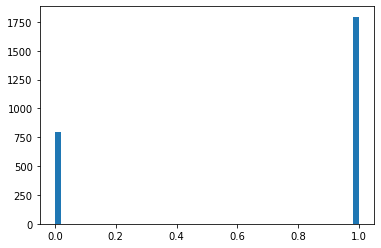

In [ ]:
target = 'SPX_1M_POS'
y = df[target]
X = df.drop(target, axis=1)

plt.hist(df1[target],bins=50);

In [ ]:
X.shape, y.shape

((2303, 10), (2303,))

In [ ]:
y.value_counts()

1    1613
0     690
Name: SPX_1M_POS, dtype: int64

In [ ]:
cutoff = '2018-01-01'
mask = (X.index < cutoff)

X_train = X.loc[mask]
y_train = y.loc[mask]

cutoff2_start = '2018-01-01' 
cutoff2_end = '2020-01-01'
mask_val_a = X.index >= cutoff2_start
mask_val_b = X.index < cutoff2_end
mask_2 = mask_val_b & mask_val_a


X_val = X.loc[mask_2]
y_val = y.loc[mask_2]

mask_test_a = X.index >= cutoff2_end
X_test = X.loc[mask_test_a]
y_test = y.loc[mask_test_a]




print('original size', y.shape[0])
print('test size', X_train.shape[0])
print('validation size', y_val.shape[0])
print('test size', y_test.shape[0])
print('test size;',(X_train.shape[0]) / y.shape[0])
print('val size;',(X_val.shape[0]) / y.shape[0])
print('test size;',(X_test.shape[0]) / y.shape[0])


original size 2303
test size 1453
validation size 439
test size 411
test size; 0.6309161962657404
val size; 0.19062092922275292
test size; 0.17846287451150672


In [ ]:
df.tail()

,SPX_1M_POS,2_10_curve,SPX_IV,LOIS,INFL_SWP_5Y,CDX_IG,CDX_HY,EUR_3M_FRA_OIS_1,GBP_3M_FRA_OIS_1,INFLATION_CURVE_1_10,INFLATION_CURVE_1_5
date,,,,,,,,,,,
2021-07-22,0,107.646,12.93,0.105,2.568,49.995,109.936,-5.2,2.60,-0.4172,-0.2682
2021-07-23,0,107.420,11.83,0.105,2.568,49.995,109.936,-5.3,2.59,-0.4172,-0.2682
2021-07-24,0,107.420,11.83,0.105,2.568,49.995,109.936,-5.3,2.59,-0.4172,-0.2682
2021-07-25,0,107.420,11.83,0.105,2.568,49.995,109.936,-5.3,2.59,-0.4172,-0.2682
2021-07-26,0,109.348,13.83,0.105,2.568,49.995,109.936,-5.2,2.55,-0.4172,-0.2682


In [ ]:
# weighted class for train data

X_train = X_train.fillna(0)
y_train = y_train.fillna(0)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# weighted class for val data

X_val = X_val.fillna(0)
y_val = y_val.fillna(0)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote_val, y_smote_val = sm.fit_resample(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## **BASELINE ACC**

In [ ]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.6992429456297315


## **RANDOM FORREST**

In [ ]:
#Random forrest
model = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
                           max_depth=19,
                           n_estimators=116,
                           random_state=42,
                           n_jobs=-1)
                           )


model.fit(X_smote, y_smote)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=19, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=116, n_jobs=-1,
                              

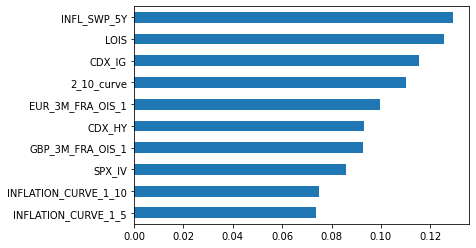

In [ ]:
#Random forrest
importances = model.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances, index=features).sort_values().tail(14).plot(kind='barh');

In [ ]:
pd.Series(importances, index=features).sort_values().tail(20)

INFLATION_CURVE_1_5     0.073803
INFLATION_CURVE_1_10    0.074867
SPX_IV                  0.085894
GBP_3M_FRA_OIS_1        0.092631
CDX_HY                  0.092982
EUR_3M_FRA_OIS_1        0.099740
2_10_curve              0.110134
CDX_IG                  0.115342
LOIS                    0.125406
INFL_SWP_5Y             0.129201
dtype: float64

##**GRADIENT BOOSTING**


In [ ]:
#Gradient boosting
model_gbm = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    GradientBoostingClassifier(max_depth=12,
                               n_estimators=22,
                              random_state=42)
)


model_gbm.fit(X_smote, y_smote)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('gradientboostingclassifier',
                 GradientBoostingClas...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=12, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_s

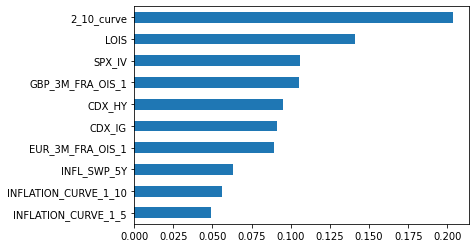

In [ ]:
#Gradient boost
gbm_importances = model_gbm.named_steps['gradientboostingclassifier'].feature_importances_
gbm_features = X_train.columns
pd.Series(gbm_importances, index=gbm_features).sort_values().tail(14).plot(kind='barh');


##**EXTREME GRADIENT BOOST**


In [ ]:
#Xtreme gradient boost
model_xgb = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    XGBClassifier(random_state=42,
                  max_depth = 17,
                  n_estimators = 34,
                  n_jobs=-1)
)

# Fit on train, score on val
model_xgb.fit(X_smote, y_smote)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=17,
                               min_child_weight=1, missing=None,
                               n_estimators=34, n_jobs=-1, nthread=None,
                               objective='binary

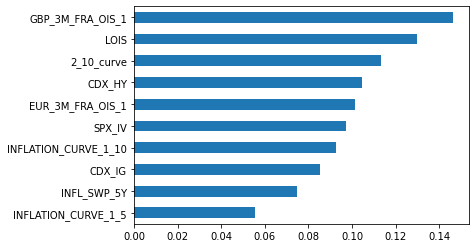

In [ ]:
#Xtreme gradient boost

importances_xgb =  model_xgb.named_steps['xgbclassifier'].feature_importances_
feature_names_xgb = X_train.columns
feat_imp =pd.Series(data=importances_xgb,index=feature_names_xgb).sort_values()
feat_imp.tail(10).plot(kind='barh')

## **SCORES**

In [ ]:
#scores
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
test_acc = model.score(X_test, y_test)

train_acc_gbm = model_gbm.score(X_train, y_train)
val_acc_gbm = model_gbm.score(X_val, y_val)
test_acc_gbm = model_gbm.score(X_test, y_test)

train_acc_xgb = model_xgb.score(X_train, y_train)
val_acc_xgb = model_xgb.score(X_val, y_val)
test_acc_xgb = model_xgb.score(X_test, y_test)

#############
print('------TRAINING DATA------')
print('Training Random Forrest Accuracy Score:', train_acc)
print('Training Gradient Boost Accuracy Score:', train_acc_gbm)
print('Training EXTREME Gradient Boost Accuracy', train_acc_xgb)
print('')
print('------VALIDATION DATA------')
print('Validation Random Forrest Accuracy Score:', val_acc)
print('Validation Gradient Boost Accuracy Score:', val_acc_gbm)
print('Validation EXTREME Gradient Boost Accuracy', val_acc_xgb)
print('')
print('------TEST DATA------------')
print('Test Random Forrest Accuracy Score:', test_acc)
print('Test Gradient Boost Accuracy Score:', test_acc_gbm)
print('Test EXTREME Gradient Boost Accuracy Score:', test_acc_xgb)
print('')
print('------BASELINE DATA------------')
print('Baseline Accuracy:', baseline_acc)

------TRAINING DATA------
Training Random Forrest Accuracy Score: 1.0
Training Gradient Boost Accuracy Score: 1.0
Training EXTREME Gradient Boost Accuracy 0.9958706125258087

------VALIDATION DATA------
Validation Random Forrest Accuracy Score: 0.6560364464692483
Validation Gradient Boost Accuracy Score: 0.592255125284738
Validation EXTREME Gradient Boost Accuracy 0.6355353075170843

------TEST DATA------------
Test Random Forrest Accuracy Score: 0.7493917274939172
Test Gradient Boost Accuracy Score: 0.7493917274939172
Test EXTREME Gradient Boost Accuracy Score: 0.7493917274939172

------BASELINE DATA------------
Baseline Accuracy: 0.6992429456297315


## **SHAP TESTING**

In [ ]:
#INSTALL
!pip install shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=1fea573f5f6e4219762468443812e9738d56641f6914fbd5e7a016eefea972bd
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
#IMPORT
import shap as shap

In [ ]:
#SHAP AS RFC
X_val1 = X_test.fillna(0)
y_val1 = y_test.fillna(0)
X_Shap = OrdinalEncoder().fit_transform(X_val1)
model_shap = RandomForestClassifier(n_estimators=25,max_depth=17,random_state=42,n_jobs=-1)                                                                             
model_shap.fit(X_Shap,y_val1)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=17, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#ORIGINAL SAMPLING ORDERING
X_Shap.shape
X_shap1 = X_Shap

explainer = shap.TreeExplainer(model_shap)
shap_values = explainer.shap_values(X_shap1)

shap.initjs()
shap.force_plot(base_value=explainer.expected_value[1],
                shap_values=shap_values[0],
                features=X_shap1,
                link='logit')


Exact explainer: 412it [02:20,  2.94it/s]


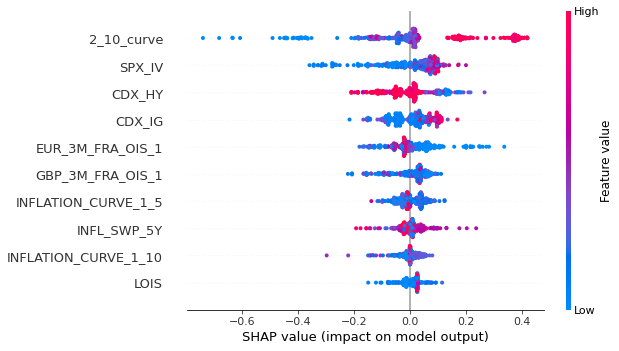

In [ ]:
#EXPLAINER EBM
explainer_ebm = shap.Explainer(model_shap.predict, X_Shap)
shap_values_ebm = explainer_ebm(X_Shap)
shap.plots.beeswarm(shap_values_ebm, max_display=14)


## **RANDOM FORREST OPTIMIZE**



In [ ]:
#Random forrest optimize
 
clf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(random_state=42)
)

param_grid = {
    'randomforestclassifier__max_depth': range(4,24,1),
    'randomforestclassifier__n_estimators': range(10,120,1)

}

In [ ]:
#Random forrest optimize
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tuning
model_1 = RandomizedSearchCV(
    clf,
    param_distributions = param_grid,
    n_iter = 100,
    cv = 50,
    n_jobs = -1,
)
model_1.fit(X_val, y_val)

RandomizedSearchCV(cv=50, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                  

In [ ]:
#Random forrest optimize
model_1.best_params_


{'randomforestclassifier__max_depth': 12,
 'randomforestclassifier__n_estimators': 118}

In [ ]:
test_acc = model_1.best_score_
print('Testing Accuracy Score:', test_acc)

Testing Accuracy Score: 0.9005555555555554


##**GRADIENT OPTIMIZE**


In [ ]:
#Gradient OPTIMIZE
 
gbm_clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    GradientBoostingClassifier(random_state=42)
)

gbm_param_grid = {
    'simpleimputer__strategy':['mean','median'],
    'gradientboostingclassifier__max_depth': range(4,24,1),
    'gradientboostingclassifier__n_estimators': range(4,100,2),
   

}

In [ ]:
#Gradient OPTIMIZE

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tuning
model_2 = RandomizedSearchCV(
    gbm_clf,
    param_distributions = gbm_param_grid,
    n_iter = 100,
    cv = 10,
    verbose = 1
)
model_2.fit(X_val,y_val)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,

In [ ]:
#XGB optimize
model_2.best_params_


{'gradientboostingclassifier__max_depth': 6,
 'gradientboostingclassifier__n_estimators': 4,
 'simpleimputer__strategy': 'median'}

In [ ]:
test_acc_2 = model_2.best_score_
print('Testing Accuracy Score:', test_acc_2)

Testing Accuracy Score: 0.6673890063424948


## **RF PERMUTATION IMPORTANCE**

In [ ]:
model_RFPI = make_pipeline(
    OrdinalEncoder(), 
    RandomForestClassifier(random_state=42,n_jobs=-1, max_depth=16, n_estimators = 61))

model_RFPI.fit(X_smote,y_smote);

In [ ]:
print('The validation accuracy for all features is', model_RFPI.score(X_val,y_val))

The validation accuracy for all features is 0.6583143507972665


In [ ]:
X_val_permRFPI = X_val.copy()
X_val_permRFPI['INFL_SWP_5Y'] = np.random.permutation(X_val_permRFPI['INFL_SWP_5Y'])

In [ ]:
print('The validation accuracy by shuffling the quantity column is', model_RFPI.score(X_val_permRFPI,y_val))

# Using sklearn permutation_importance library
from sklearn.inspection import permutation_importance
perm_impRF = permutation_importance(model_RFPI,X_val,y_val,random_state=42)

dataRF = {'imp_mean':perm_impRF['importances_mean'],
        'imp_std':perm_impRF['importances_std']}
df_permRF = pd.DataFrame(dataRF,index=X_val.columns).sort_values(by='imp_mean')

The validation accuracy by shuffling the quantity column is 0.6378132118451025


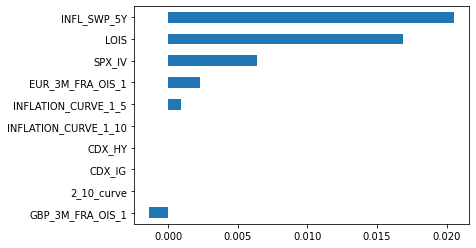

In [ ]:
df_permRF['imp_mean'].tail(10).plot(kind='barh')

In [ ]:
df_permRF

,imp_mean,imp_std
GBP_3M_FRA_OIS_1,-0.001367,0.001822
2_10_curve,0.000000,0.000000
CDX_IG,0.000000,0.000000
CDX_HY,0.000000,0.000000
INFLATION_CURVE_1_10,0.000000,0.000000
INFLATION_CURVE_1_5,0.000911,0.001116
EUR_3M_FRA_OIS_1,0.002278,0.002495
SPX_IV,0.006378,0.002656
LOIS,0.016856,0.002323
INFL_SWP_5Y,0.020501,0.004556


##**XGB PERMUTATION IMPORTANCE**




In [ ]:
model_dci = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'), 
    GradientBoostingClassifier(random_state=42, max_depth=5, n_estimators = 84))

model_dci.fit(X_smote,y_smote);

In [57]:
print('The validation accuracy for all features is', model_dci.score(X_val,y_val))

The validation accuracy for all features is 0.5671981776765376


In [58]:
X_val_perm = X_val.copy()
X_val_perm['CDX_IG'] = np.random.permutation(X_val_perm['CDX_IG'])

In [59]:
print('The validation accuracy by shuffling the quantity column is', model_dci.score(X_val_perm,y_val))

The validation accuracy by shuffling the quantity column is 0.5580865603644647


In [60]:
# Using sklearn permutation_importance library
from sklearn.inspection import permutation_importance
perm_imp = permutation_importance(model_dci,X_val,y_val,random_state=42)

In [61]:
data = {'imp_mean':perm_imp['importances_mean'],
        'imp_std':perm_imp['importances_std']}
df_perm = pd.DataFrame(data,index=X_val.columns).sort_values(by='imp_mean')

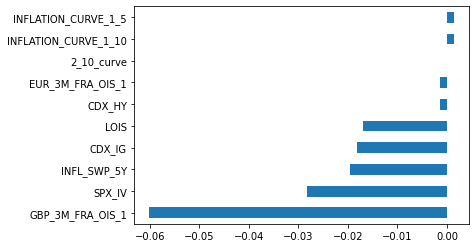

In [62]:
df_perm['imp_mean'].tail(10).plot(kind='barh')

In [63]:
df_perm

,imp_mean,imp_std
GBP_3M_FRA_OIS_1,-0.060137,0.003409
SPX_IV,-0.028246,0.011122
INFL_SWP_5Y,-0.019590,0.009180
CDX_IG,-0.018223,0.006112
LOIS,-0.016856,0.009292
CDX_HY,-0.001367,0.003090
EUR_3M_FRA_OIS_1,-0.001367,0.002323
2_10_curve,0.000000,0.000000
INFLATION_CURVE_1_10,0.001367,0.002323
INFLATION_CURVE_1_5,0.001367,0.003090


##**XGB BOOST OPTIMIZE**



In [64]:
##XGB BOOST optimize
 
KGB_clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(random_state=42)
)

KGB_param_grid = {
    'simpleimputer__strategy':['mean','median'],
    'xgbclassifier__max_depth': range(4,24,1),
    'xgbclassifier__n_estimators': range(4,100,2),
   

}



In [65]:
##XGB BOOST optimize
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Hyperparameter tuning
model_3 = RandomizedSearchCV(
    KGB_clf,
    param_distributions = KGB_param_grid,
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
model_3.fit(X_smote,y_smote)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,


In [ ]:
#XGB BOOST optimize
model_3.best_params_


In [67]:
test_acc_3 = model_3.best_score_
print('Testing Accuracy Score:', test_acc_3)

Testing Accuracy Score: 0.5167427167427168
Testing Accuracy Score: 0.5167427167427168


## **COMMUNICATE RESULTS**